# Importaciones

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time

# 4. Visualización de datos en Matplotlib

## Introducción MatplotLib

In [229]:
#np.random.seed(0)
df = pd.read_csv("D:/Datasets/base_datos_2008.csv", nrows=100000)

In [230]:
data = np.unique(df["Cancelled"], return_counts= True)
data

(array([0, 1]), array([98858,  1142]))

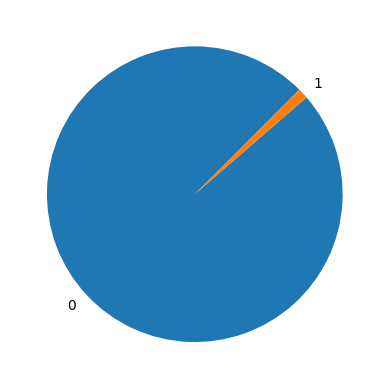

In [231]:
plt.pie(x = data[1],
        labels=data[0],
        startangle=45)
plt.show()

## Modificar elementos del gráfico en Matplotlib

In [232]:
np.random.seed(0)
df = pd.read_csv("D:/Datasets/base_datos_2008.csv", nrows=100000)
df = df.sample(frac=1).head(100)

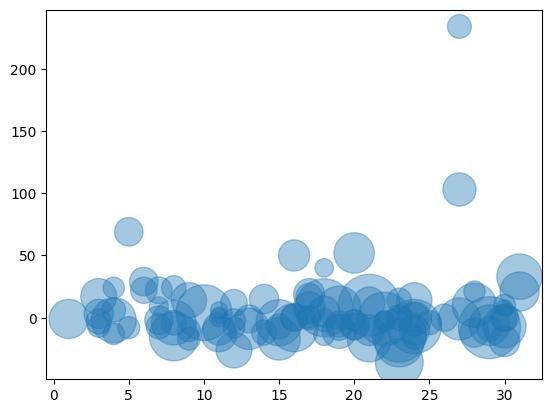

In [233]:
plt.scatter(x = df["DayofMonth"], y = df["ArrDelay"], s = df["Distance"],alpha=0.4)

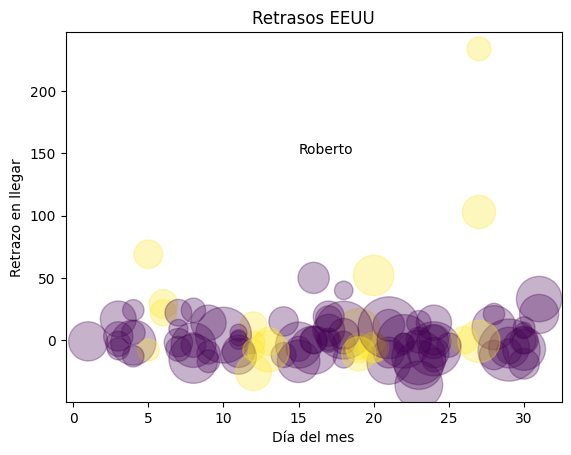

In [234]:
plt.scatter(x = df["DayofMonth"], y = df["ArrDelay"] , s = df["Distance"] , alpha=0.30 , c = df["DayOfWeek"].isin([6,7]))
plt.title("Retrasos EEUU")
plt.xlabel("Día del mes")
plt.ylabel("Retrazo en llegar")
plt.text(x = 15 , y = 150 , s = "Roberto")
plt.show()


## Etiquetas y leyendas en Matplotlib

In [235]:
# Volvemos a importar el csv 
df = pd.read_csv("D:/Datasets/base_datos_2008.csv", nrows=1000000)

In [236]:
data = np.unique(df["DayOfWeek"] , return_counts = True)
labs = ["Lun", "Mar", "Mie", "Jue", "Vie", "Sab", "Dom"]

dataframe = pd.DataFrame(data)
data

(array([1, 2, 3, 4, 5, 6, 7]),
 array([137229, 152498, 155928, 159416, 153724, 112352, 128853]))

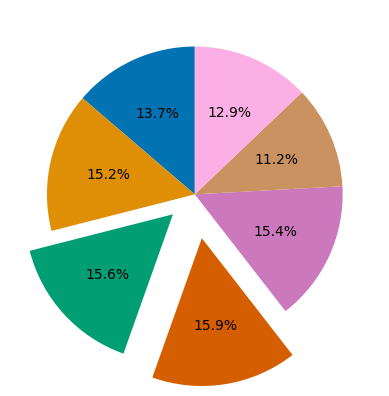

In [237]:
plt.pie(x = data[1],
        # labels=labs,
        radius=1,
        colors=sns.color_palette("colorblind"),
        explode=(0,0,0.2,0.3,0,0,0),
        autopct="%1.1F%%",
        startangle=90)
plt.show()

[Text(0.5, 0, 'Dia de la semana'), Text(0, 0.5, 'Nuemro de vuelos')]

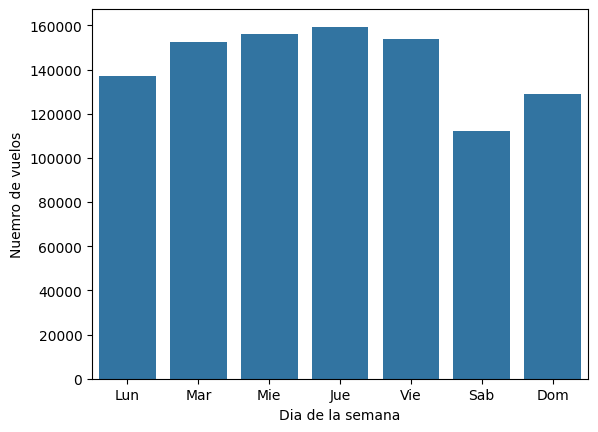

In [238]:
plt = sns.barplot(x=labs, y = data[1])
plt.set(xlabel="Dia de la semana", ylabel = "Nuemro de vuelos")

## Gráfico para series temporales en Matplotlib

In [239]:
df = pd.read_csv("D:/Datasets/base_datos_2008.csv")

In [240]:
# los vuelos que tengan origen es esos tres aeropuertos
df2 = df["Origin"].isin(["ATL","HOU","IND"])
# el primer medio millon de datos del data set original
df = df.head(500000) 

In [241]:
# Creación de una lista vacia times
times = []
for i in np.arange(len(df)):
    times.append(datetime.datetime(year=2008,month=df.loc[i,"Month"], day=df.loc[i,"DayofMonth"]))
    

In [242]:
# accedo a la fila 50.000
times[50000]

datetime.datetime(2008, 1, 18, 0, 0)

In [243]:
df["Time"]= times

In [244]:
df["Time"].head(5)

0   2008-01-03
1   2008-01-03
2   2008-01-03
3   2008-01-03
4   2008-01-03
Name: Time, dtype: datetime64[ns]

In [245]:
data

(array([1, 2, 3, 4, 5, 6, 7]),
 array([137229, 152498, 155928, 159416, 153724, 112352, 128853]))

In [250]:
# as_index resetea el indice para que no tome la columna time como indice
data = df.groupby(by=["Time"], as_index=False)[["DepDelay","ArrDelay"]].mean()

In [251]:
data.head(5)

,Time,DepDelay,ArrDelay
0,2008-01-01,20.545599,20.999240
1,2008-01-02,23.324222,22.131194
2,2008-01-03,16.697759,14.479569
3,2008-01-04,14.058087,11.851733
4,2008-01-05,18.381555,17.138031


<Axes: xlabel='Time', ylabel='DepDelay'>

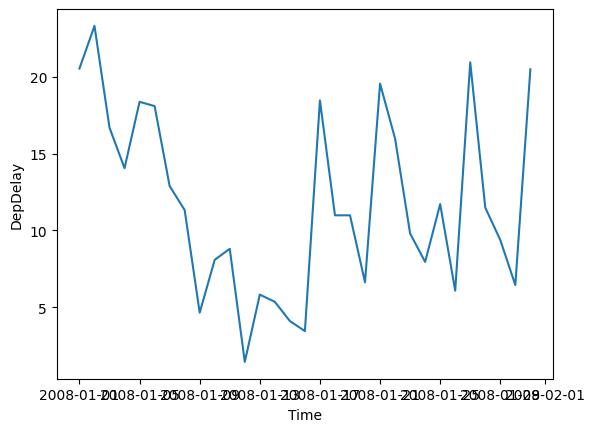

In [253]:
sns.lineplot(x=data["Time"],y=data["DepDelay"])

<Axes: >

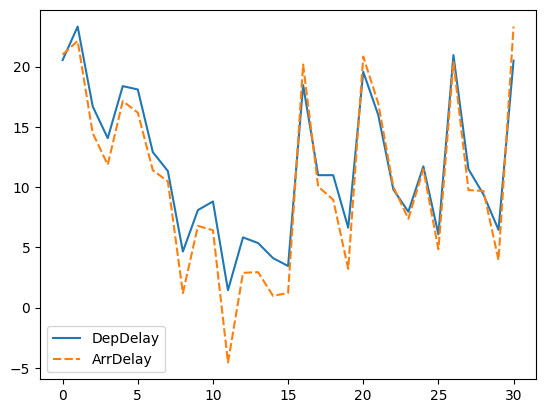

In [254]:
sns.lineplot(data = data)